In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2 as cv
from itertools import chain

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [4]:
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split

In [56]:
dog_list = glob("./sibal/train/dog*")
cat_list = glob("./sibal/train/cat*")
data_list = list(chain(dog_list, cat_list))

In [57]:
y = []
for i in data_list:
    if 'dog' in i:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)

In [58]:
np.sum(y)

12500

In [59]:
X = np.zeros((25000, 150, 150, 3))

In [60]:
for idx, val in enumerate(data_list):
    dt = plt.imread(val)
    dt = cv.resize(dt, (150, 150)).reshape(1, 150, 150, -1)
    X[idx] = dt[:, :, :, :3]

In [61]:
plt.imread(data_list[0]).shape

(375, 499, 3)

In [62]:
cv.resize(plt.imread(data_list[0]), (150, 150)).shape

(150, 150, 3)

In [63]:
cv.resize(plt.imread(data_list[0]), (150, 150)).reshape(1, 150, 150, -1).shape

(1, 150, 150, 3)

In [12]:
np.save("data.npy", X)

In [64]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [65]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [66]:
conv_base = VGG16(include_top=False, input_shape=(150,150, 3))

In [67]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [68]:
conv_base.layers

In [71]:
a = Sequential(Dense(4*4*512, activation='relu'))

In [72]:
a.layers[0]

In [73]:
X_train_trans = conv_base.predict(X_train) 
X_validation_trans = conv_base.predict(X_validation)

157/157 [==============================] - 111s 706ms/step


In [101]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ]
)

In [75]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [76]:
model.fit(X_train_trans, y_train, batch_size=64, epochs=20, validation_data=(X_validation_trans, y_validation))

Epoch 1/20


235/235 [==============================] - 6s 21ms/step - loss: 0.1460 - accuracy: 0.9403 - val_loss: 0.1077 - val_accuracy: 0.9584
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0566 - accuracy: 0.9789 - val_loss: 0.1348 - val_accuracy: 0.9504
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0290 - accuracy: 0.9898 - val_loss: 0.1664 - val_accuracy: 0.9490
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0214 - accuracy: 0.9917 - val_loss: 0.1606 - val_accuracy: 0.9552
Epoch 5/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.1951 - val_accuracy: 0.9518
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.1894 - val_accuracy: 0.9504
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.1760 - val_accuracy: 0.95

In [77]:
model.evaluate(conv_base.predict(X_test), y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9532


[0.2583945691585541, 0.9531999826431274]

In [78]:
dt = plt.imread("./sibal/catimg.jpg")

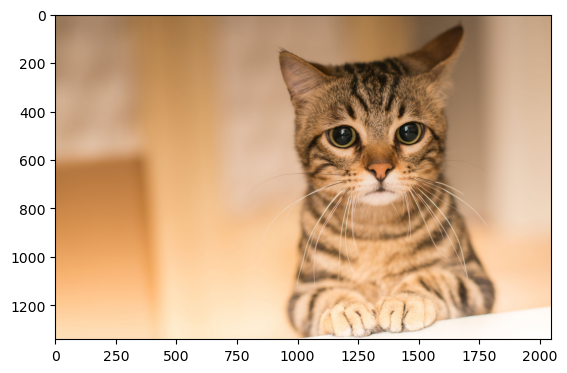

In [79]:
plt.imshow(dt)

In [80]:
def cat_dog(x):
    img = plt.imread(x)
    dt = cv.resize(img, (150,150)).reshape(1, 150, 150, -1)
    dt = dt[:, :, :, :3]
    result = np.where(model.predict(conv_base.predict(dt)) > 0.5, "고양이", "강아지")
    print(result)
    plt.imshow(img)
    plt.show()

1/1 [==============================] - 0s 79ms/step
[['고양이']]


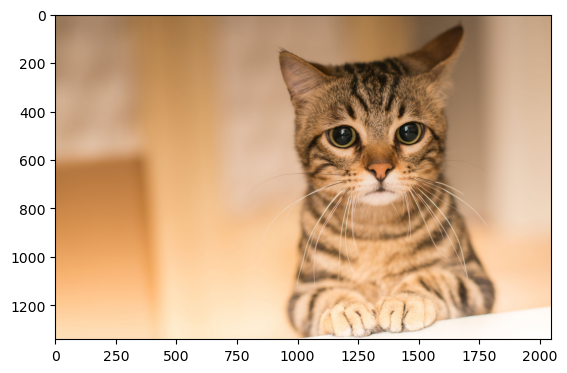

In [81]:
cat_dog("./sibal/catimg.jpg")

1/1 [==============================] - 0s 26ms/step
[['고양이']]


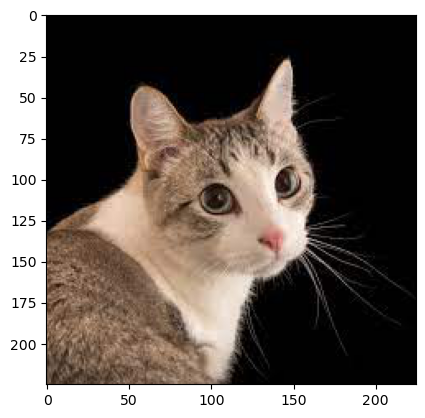

In [82]:
cat_dog("./sibal/catimg2.jpg")

1/1 [==============================] - 0s 19ms/step
[['고양이']]


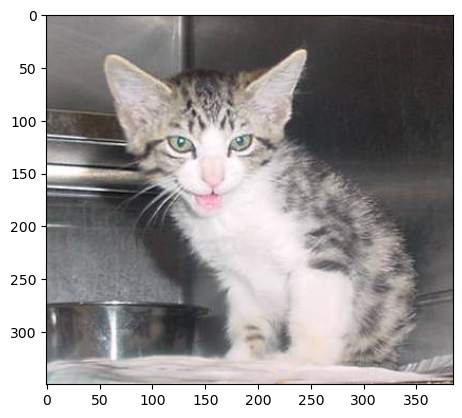

1/1 [==============================] - 0s 14ms/step
[['강아지']]


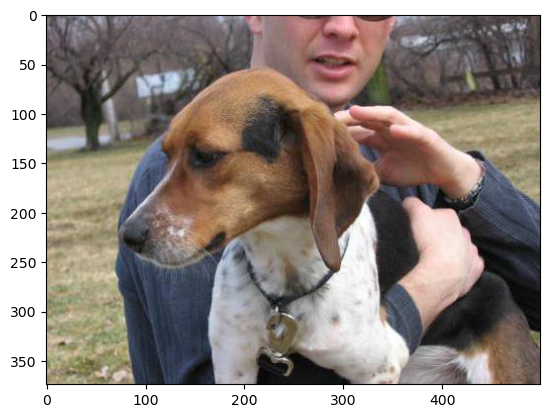

1/1 [==============================] - 0s 18ms/step
[['고양이']]


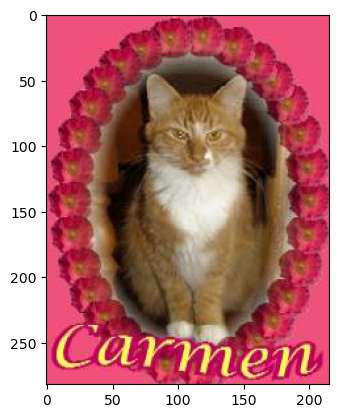

1/1 [==============================] - 0s 25ms/step
[['강아지']]


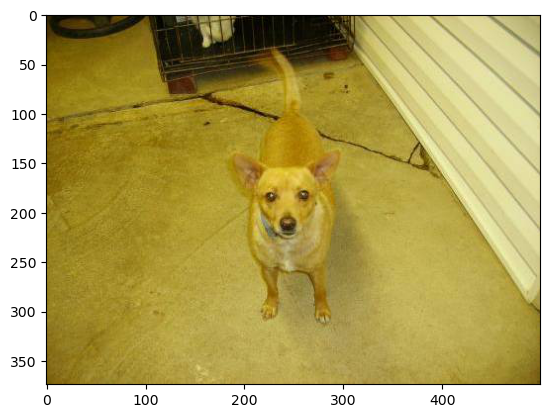

1/1 [==============================] - 0s 27ms/step
[['고양이']]


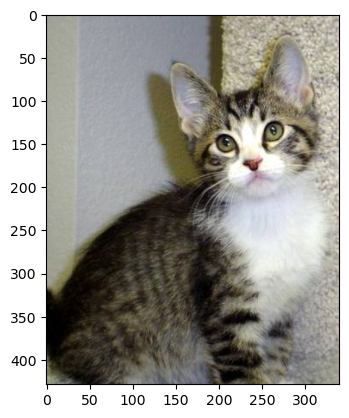

1/1 [==============================] - 0s 20ms/step
[['고양이']]


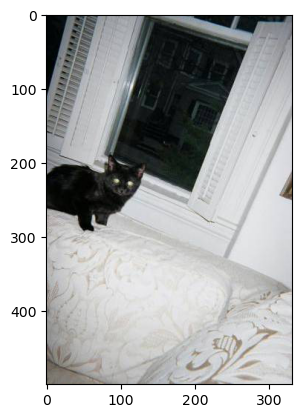

1/1 [==============================] - 0s 23ms/step
[['강아지']]


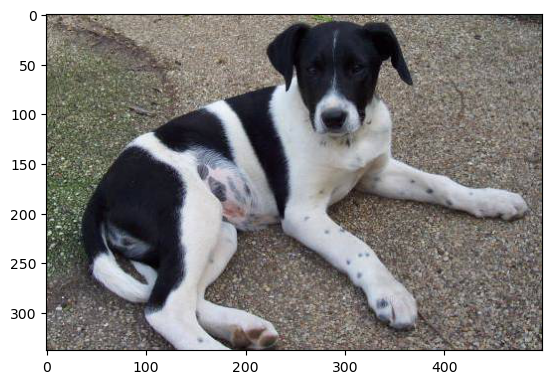

1/1 [==============================] - 0s 24ms/step
[['고양이']]


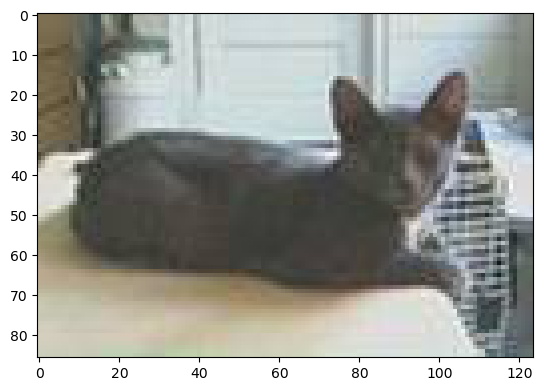

1/1 [==============================] - 0s 19ms/step
[['강아지']]


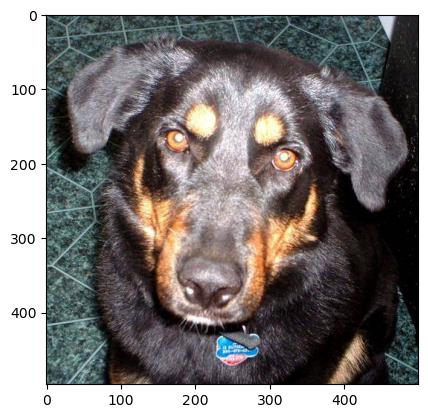

1/1 [==============================] - 0s 21ms/step
[['강아지']]


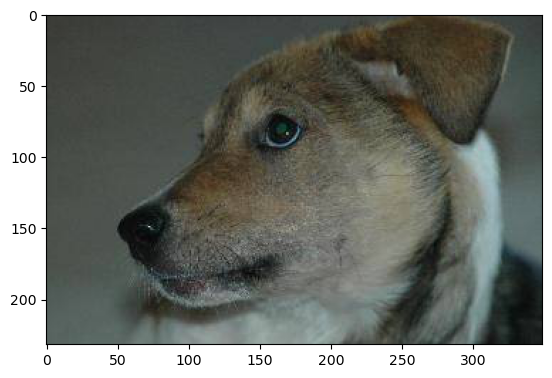

In [83]:
for i in np.random.choice(np.arange(25000), 10):
    cat_dog(data_list[i])

In [84]:
conv_base.layers[1]

In [85]:
conv_base.layers

In [86]:
model_test = Sequential()
model_test.add(conv_base)
model_test.add(Dense(100, activation='relu'))
model_test.summary()
# 밑에랑 같은 거

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 dense_14 (Dense)            (None, 4, 4, 100)         51300     
                                                                 
Total params: 14765988 (56.33 MB)
Trainable params: 14765988 (56.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
tmp = conv_base.layers
tmp.append(Dense(100, activation='relu'))
model_test = Sequential()
for i in tmp:
    model_test.add(i)
model_test.summary()
# 위에랑 같은 거

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)      

In [88]:
model_test.layers[1].get_weights()

[array([[[[ 1.66219279e-01,  1.42701820e-01, -4.02113283e-03, ...,
            6.18828237e-02, -1.74057148e-02, -3.00644431e-02],
          [ 9.46945231e-03,  3.87477316e-03,  5.08365929e-02, ...,
           -2.77981739e-02,  1.71373668e-03,  6.82722731e-03],
          [ 6.32681847e-02,  2.12877709e-02, -1.63465310e-02, ...,
            8.80054955e-04,  6.68104272e-03, -1.41139806e-03],
          ...,
          [ 3.47490981e-03,  8.47019628e-02, -4.07223180e-02, ...,
           -1.13523193e-02, -7.48998486e-03,  3.19077494e-03],
          [ 5.97234145e-02,  4.97663505e-02, -3.23118735e-03, ...,
            1.43114366e-02,  3.03175431e-02, -4.23925705e-02],
          [ 1.33459672e-01,  4.95484173e-02, -1.78808011e-02, ...,
            2.25385167e-02,  3.02020740e-02, -2.17075031e-02]],
 
         [[ 2.12007999e-01,  2.10127644e-02, -1.47626130e-02, ...,
            2.29580477e-02,  1.23102348e-02, -3.08422819e-02],
          [-2.62175221e-03,  7.42094172e-03,  6.74030930e-02, ...,
     

In [89]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [90]:
input_ = Input(shape=(150, 150, 3))
x = Conv2D(64, (3, 3), activation='relu')

In [91]:
model_test = Sequential(
    [
        Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3))
    ]
)
model_test

In [92]:
input_ = Input(shape=(150, 150, 3))
layer1 = Conv2D(64, (3, 3), activation='relu')(input_)
layer2 = MaxPooling2D((2, 2))(layer1)
layer3 = Flatten()(layer2)
layer4 = Dense(10, activation='relu')(layer3)
output_ = Dense(3, activation='softmax')(layer4)
model_test = Model(inputs=input_, outputs=output_)
model_test.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 350464)            0         
                                                                 
 dense_16 (Dense)            (None, 10)                3504650   
                                                                 
 dense_17 (Dense)            (None, 3)                 33        
                                                           

In [93]:
model_test.predict(np.random.randn(2, 150, 150, 3)).shape

1/1 [==============================] - 0s 63ms/step


(2, 3)

In [94]:
from tensorflow.keras.layers import Reshape, Concatenate

In [95]:
conv_base.layers

In [96]:
# # MaxPooling2D : strides / pool_size / padding
# # Conv2D : activation / kernel_size / filters / strides / padding
# input_ = Input(shape=(150, 150, 3))
# layer_ = input_
# for layer in conv_base.layers[1:]:
#     if 'conv' in repr(layer):
#         activation = layer.activation
#         strides = layer.strides
#         kernel_size = layer.kernel_size
#         filters = layer.filters
#         padding = layer.padding
#         layer_ = Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, strides=strides, padding=padding)(layer_)
#     elif 'pool' in repr(layer):
#         pool_size = layer.pool_size
#         strides = layer.strides
#         padding = layer.padding
#         layer_ = MaxPooling2D(pool_size=pool_size, strides=strides, padding=padding)(layer_)
# layer_ = Flatten()(layer_)
# layer_ = Dense(256, activation='relu')(layer_)
# layer_ = Dense(128, activation='relu')(layer_)
# layer_ = Dense(1, activation='sigmoid')(layer_)
# model_test = Model(inputs=[input_], outputs=[layer_])

# MaxPooling2D : strides / pool_size / padding
# Conv2D : activation / kernel_size / filters / strides / padding
input_ = Input(shape=(150, 150, 3))
layer_ = input_
for layer in conv_base.layers[1:]:
    layer_ = layer(layer_)
layer_ = Flatten()(layer_)
layer_ = Dense(256, activation='relu')(layer_)
layer_ = Dense(128, activation='relu')(layer_)
layer_ = Dense(1, activation='sigmoid')(layer_)
model_test = Model(inputs=[input_], outputs=[layer_])


In [97]:
model_test.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [98]:
model_test.predict(np.random.randn(3, 150, 150, 3))

1/1 [==============================] - 0s 218ms/step


array([[0.47709528],
       [0.46980512],
       [0.46378744]], dtype=float32)

In [102]:
input_ = Input(shape=(150, 150, 3))
layer_ = input_
for layer in conv_base.layers[1:]:
    layer_ = layer(layer_)
for layer in model.layers:
    layer_ = layer(layer_)

model_test = Model(inputs=[input_], outputs=[layer_])

In [146]:
model_test.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [147]:
model_test.predict(np.random.randn(3,150,150,3))

1/1 [==============================] - 0s 227ms/step


array([[0.59357655],
       [0.61553854],
       [0.5964793 ]], dtype=float32)

In [148]:
def cat_dog(x):
    img = plt.imread(x)
    dt = cv.resize(img,(150,150)).reshape(1,150,150,-1)
    dt = dt[:,:,:,:3]
    result = np.where(model_test.predict(dt) > 0.5,"고양이","강아지")[0]
    print(result)
    plt.imshow(img)
    plt.show()

1/1 [==============================] - 0s 206ms/step
['고양이']


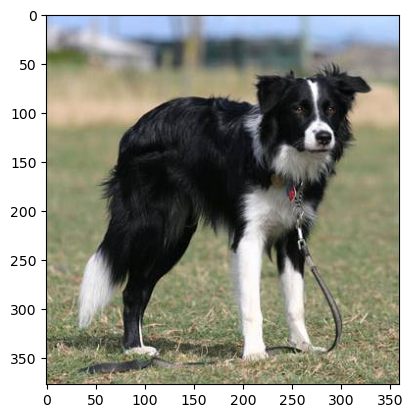

1/1 [==============================] - 0s 63ms/step
['고양이']


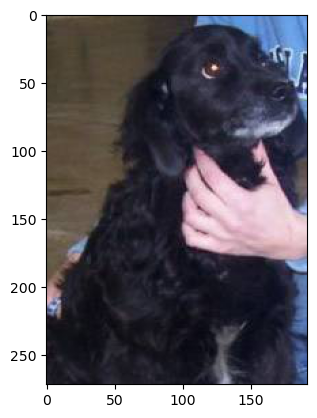

1/1 [==============================] - 0s 60ms/step
['고양이']


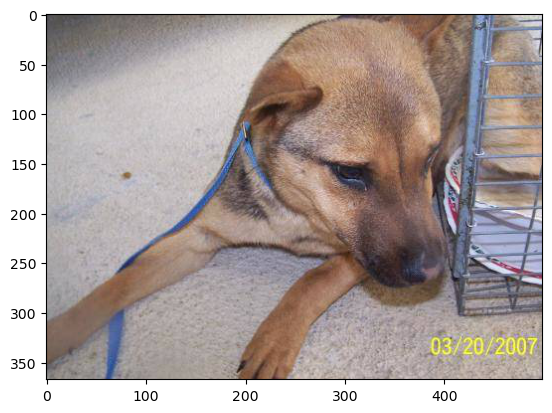

1/1 [==============================] - 0s 69ms/step
['고양이']


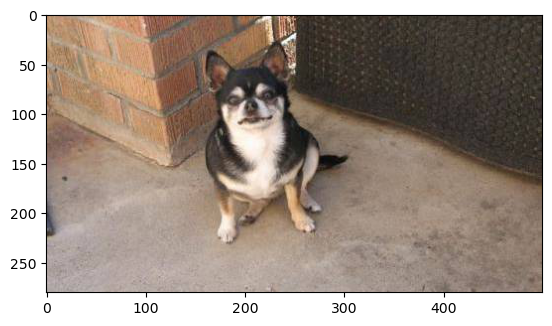

1/1 [==============================] - 0s 70ms/step
['강아지']


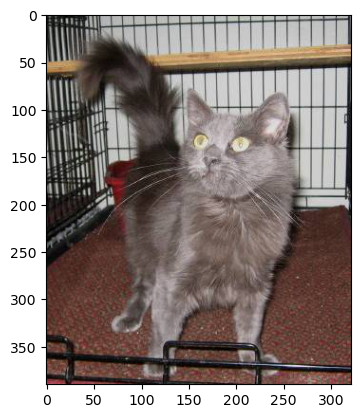

1/1 [==============================] - 0s 70ms/step
['고양이']


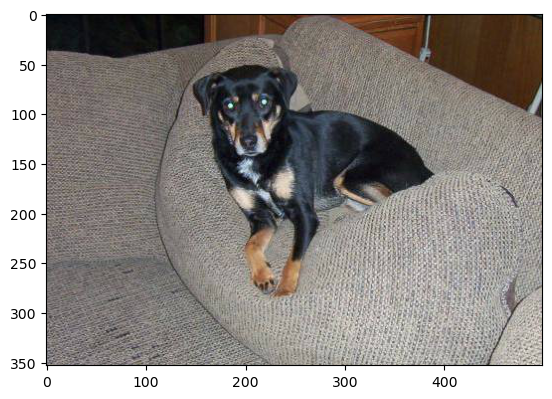

1/1 [==============================] - 0s 71ms/step
['강아지']


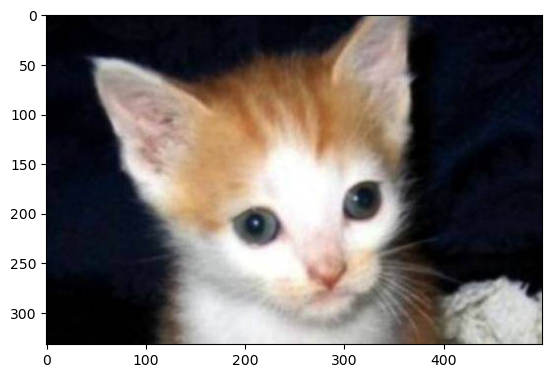

1/1 [==============================] - 0s 61ms/step
['고양이']


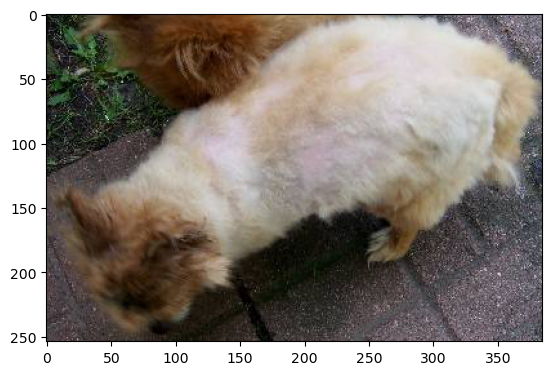

1/1 [==============================] - 0s 66ms/step
['강아지']


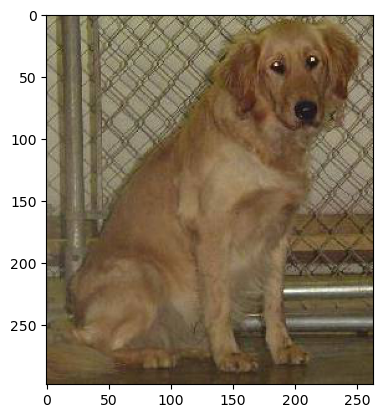

1/1 [==============================] - 0s 60ms/step
['고양이']


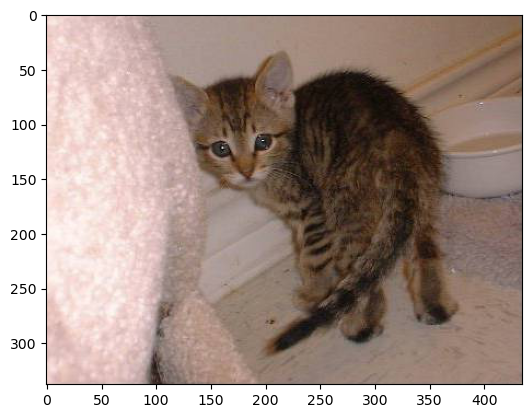

In [149]:
for i in np.random.choice(np.arange(25000),10):
    cat_dog(data_list[i])

In [150]:
from tensorflow.keras.models import save_model, load_model

In [152]:
save_model(model_test,'cat_dog_predict.h5')

C:\Users\user\AppData\Local\Temp\ipykernel_16988\1785299915.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_test,'cat_dog_predict.h5')


In [153]:
animal_predict_model = load_model('cat_dog_predict.h5')

In [155]:
x = plt.imread('./sibal/catimg.jpg')
x = cv.resize(x,(150,150))
x = x[:,:,:3]
x = x.reshape(1,150,150,3)
np.where(animal_predict_model.predict(x)>0.5,'고양이','강아지')[0]

1/1 [==============================] - 0s 59ms/step


array(['강아지'], dtype='<U3')